In [1]:
!nvidia-smi

Fri Apr  1 17:02:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    78W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

## DNN (MLP)

In [4]:
# batch 的大小，如果出現 OOM error，請降低這個值
batch_size = 128
# 類別的數量，Cifar 10 共有 10 個類別
num_classes = 10
# 訓練的 epochs 數量
epochs = 10

# 讀取資料並檢視
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 對 label 進行 one-hot encoding (y_trian 原本是純數字)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# 將資料攤平成一維資料
x_train = x_train.reshape(50000, 3072) 
x_test = x_test.reshape(10000, 3072)

# 將資料變為 float32 並標準化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
input_layer = keras.layers.Input((3072,))

x = Dense(units=512)(input_layer)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)

x = Dense(units=256)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)

x = Dense(units=128)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)

out = Dense(units=num_classes, activation="softmax")(x)

model = keras.models.Model(inputs=[input_layer], outputs=[out])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                             

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history_mlp = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("====================")
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')
print("====================")

Epoch 1/10
391/391 [==============================] - 8s 14ms/step - loss: 1.7654 - accuracy: 0.3698 - val_loss: 1.8348 - val_accuracy: 0.3305
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.5382 - accuracy: 0.4474 - val_loss: 1.6600 - val_accuracy: 0.4031
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.4414 - accuracy: 0.4858 - val_loss: 1.6638 - val_accuracy: 0.4076
Epoch 4/10
391/391 [==============================] - 4s 9ms/step - loss: 1.3735 - accuracy: 0.5105 - val_loss: 1.8633 - val_accuracy: 0.3530
Epoch 5/10
391/391 [==============================] - 4s 9ms/step - loss: 1.3237 - accuracy: 0.5309 - val_loss: 1.6556 - val_accuracy: 0.4072
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 1.2799 - accuracy: 0.5437 - val_loss: 1.4819 - val_accuracy: 0.4707
Epoch 7/10
391/391 [==============================] - 4s 9ms/step - loss: 1.2369 - accuracy: 0.5586 - val_loss: 1.9391 - val_accuracy: 0.3559
Epoc

## CNN

In [8]:
# batch 的大小，如果出現 OOM error，請降低這個值
batch_size = 128
# 類別的數量，Cifar 10 共有 10 個類別
num_classes = 10
# 訓練的 epochs 數量
epochs = 10

# 讀取資料並檢視
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 對 label 進行 one-hot encoding (y_trian 原本是純數字)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 將資料變為 float32 並標準化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [9]:
input_layer = keras.layers.Input(x_train.shape[1:])

x = Conv2D(32, (3, 3), padding='same')(input_layer)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(units=512)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)

out = Dense(units=num_classes, activation="softmax")(x)

model = keras.models.Model(inputs=[input_layer], outputs=[out])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history_cnn = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("====================")
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')
print("====================")

Epoch 1/10
391/391 [==============================] - 15s 34ms/step - loss: 1.4090 - accuracy: 0.5096 - val_loss: 2.0364 - val_accuracy: 0.3510
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 0.9520 - accuracy: 0.6634 - val_loss: 0.8951 - val_accuracy: 0.6906
Epoch 3/10
391/391 [==============================] - 13s 32ms/step - loss: 0.7980 - accuracy: 0.7182 - val_loss: 0.9021 - val_accuracy: 0.6767
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.7043 - accuracy: 0.7493 - val_loss: 0.8841 - val_accuracy: 0.6915
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 0.6348 - accuracy: 0.7760 - val_loss: 0.8752 - val_accuracy: 0.7151
Epoch 6/10
391/391 [==============================] - 13s 33ms/step - loss: 0.5791 - accuracy: 0.7964 - val_loss: 0.6636 - val_accuracy: 0.7746
Epoch 7/10
391/391 [==============================] - 13s 32ms/step - loss: 0.5312 - accuracy: 0.8109 - val_loss: 0.7182 - val_accuracy:

## Plot

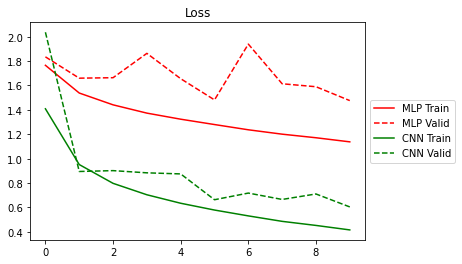

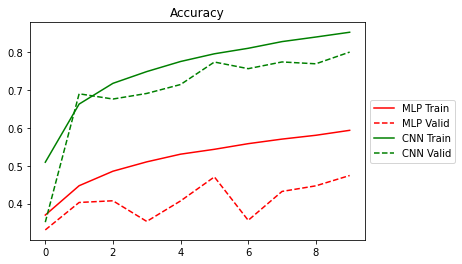

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(range(len(history_mlp.history['loss'])), 
         history_mlp.history['loss'], 
         '-', label="MLP Train", color="r")

plt.plot(range(len(history_mlp.history['val_loss'])),
         history_mlp.history['val_loss'], 
         '--', label="MLP Valid", color="r")

plt.plot(range(len(history_cnn.history['loss'])), 
         history_cnn.history['loss'], 
         '-', label="CNN Train", color="g")

plt.plot(range(len(history_cnn.history['val_loss'])),
         history_cnn.history['val_loss'], 
         '--', label="CNN Valid", color="g")

plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure()

plt.plot(range(len(history_mlp.history['accuracy'])), 
         history_mlp.history['accuracy'], 
         '-', label="MLP Train", color="r")

plt.plot(range(len(history_mlp.history['val_accuracy'])),
         history_mlp.history['val_accuracy'], 
         '--', label="MLP Valid", color="r")

plt.plot(range(len(history_cnn.history['accuracy'])), 
         history_cnn.history['accuracy'], 
         '-', label="CNN Train", color="g")

plt.plot(range(len(history_cnn.history['val_accuracy'])),
         history_cnn.history['val_accuracy'], 
         '--', label="CNN Valid", color="g")
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 作業
1. 請試著調整各個超參數，並說明那些超參數對於結果有明顯的影響？
2. CNN 與 DNN 哪個模型的參數數量比較多？造成參數的數量不同的原因在哪？